# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

Минимальные баллы для зачёта по этой работе - 3 балла. Если вы не набираете тут 3 балла, то по всему курсу вы получаете неуд<br> (см. слайды с семинара №1)

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [2]:
coins = pd.read_csv(filepath_or_buffer=".\coins.csv",index_col="date")

Посмотрим что получилось

In [3]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [4]:
len(coins['name'].unique())

70

#### 2. За какой период данные мы имеем? (0.4 балла)

In [5]:
print(coins.index[0], " - ", coins.index[-1])

2013-04-28  -  2018-06-06


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

In [277]:
print("Есть ли пропуски?", coins.isnull().values.any())
print("В сокращении?", coins['symbol'].isnull().values.any())
print("В имени?", coins['name'].isnull().values.any())
print("В цене?", coins['price'].isnull().values.any())
print("В количестве транзакций?", coins['txCount'].isnull().values.any())
print("В объеме переданных монет?", coins['txVolume'].isnull().values.any())
print("В адресах?", coins['activeAddresses'].isnull().values.any())
print("В цене открытия?", coins['open'].isnull().values.any())
print("В цене закрытия?", coins['close'].isnull().values.any())
print("В самой высокой цене?", coins['high'].isnull().values.any())
print("В самой низкой цене?", coins['low'].isnull().values.any())
print("В объеме торгов?", coins['volume'].isnull().values.any())
print("В капитализации?", coins['market'].isnull().values.any())
print("В дате?", coins.index.isnull().any())

Есть ли пропуски? True
В сокращении? False
В имени? False
В цене? True
В количестве транзакций? True
В объеме переданных монет? True
В адресах? True
В цене открытия? False
В цене закрытия? False
В самой высокой цене? False
В самой низкой цене? False
В объеме торгов? False
В капитализации? False
В дате? False


#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [263]:
maxprice = coins['price'].max()
print(coins['name'][coins['price'] == maxprice])

date
2017-12-17    Bitcoin
Name: name, dtype: object


#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

KingN Coin  - min( 10608251.0 ),  Bitcoin  - max( 57439466431000.0 )


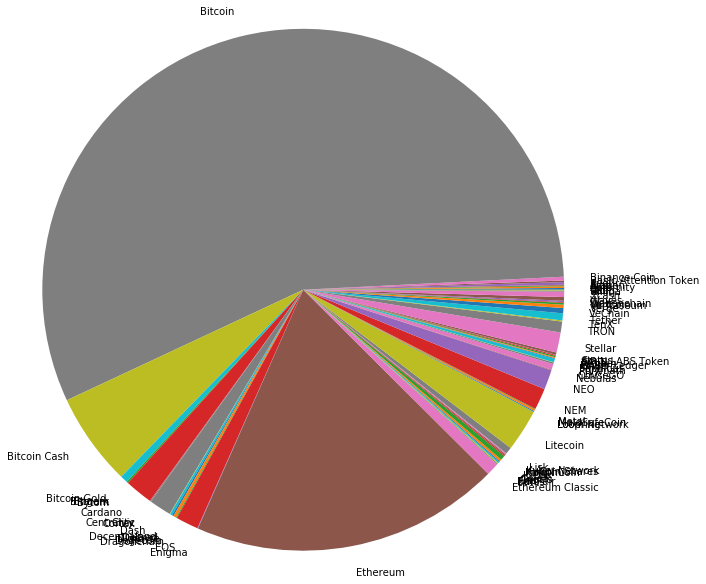

In [7]:
%matplotlib inline
min_name = ""
max_name = ""
max_sum = None
min_sum = None
unique_list = coins['name'].unique()
for name in unique_list:
    temp_sum = coins['market'][coins['name'] == name].sum()
    if (max_sum == None or max_sum  < temp_sum):
        max_sum = temp_sum
        max_name = name
    if (min_sum == None or min_sum  > temp_sum):
        min_sum = temp_sum
        min_name = name
print(min_name," - min(", min_sum,"), ", max_name, " - max(", max_sum, ")")
groups = coins.groupby(['name'])['market'].sum()
l1 = list(groups.keys())
l2 = list(groups)
plt.pie(l2, labels=l1, radius=3)
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [32]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    all_data = coins[((coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date))]
    vals1 = all_data['open']
    vals2 = all_data['close']
    vals3 = all_data['low']
    vals4 = all_data['high']
    plt.figure(figsize=(20,10))
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.title(symbol + " price information (" + start_date + " - " + end_date + ")")
    plot1 = plt.plot(list(vals1.keys()), list(vals1))
    plot2 = plt.plot(list(vals2.keys()), list(vals2))
    plot3 = plt.plot(list(vals3.keys()), list(vals3))
    plot4 = plt.plot(list(vals4.keys()), list(vals4))
    # plt.xticks([start_date, end_date])
    grid_steps = 10
    dates_count = len(all_data.index)
    x = np.arange(0,dates_count,int(dates_count/grid_steps) + 1)
    y = all_data.index[0:dates_count:int(dates_count/grid_steps) + 1] 
    plt.legend((plot1[0], plot2[0], plot3[0], plot4[0]), ('Opening price', 'Closing price', 'Lowest price', 'Highest price'))
    plt.xticks(x,y)
    plt.show()

Посмотрим, что получилось:

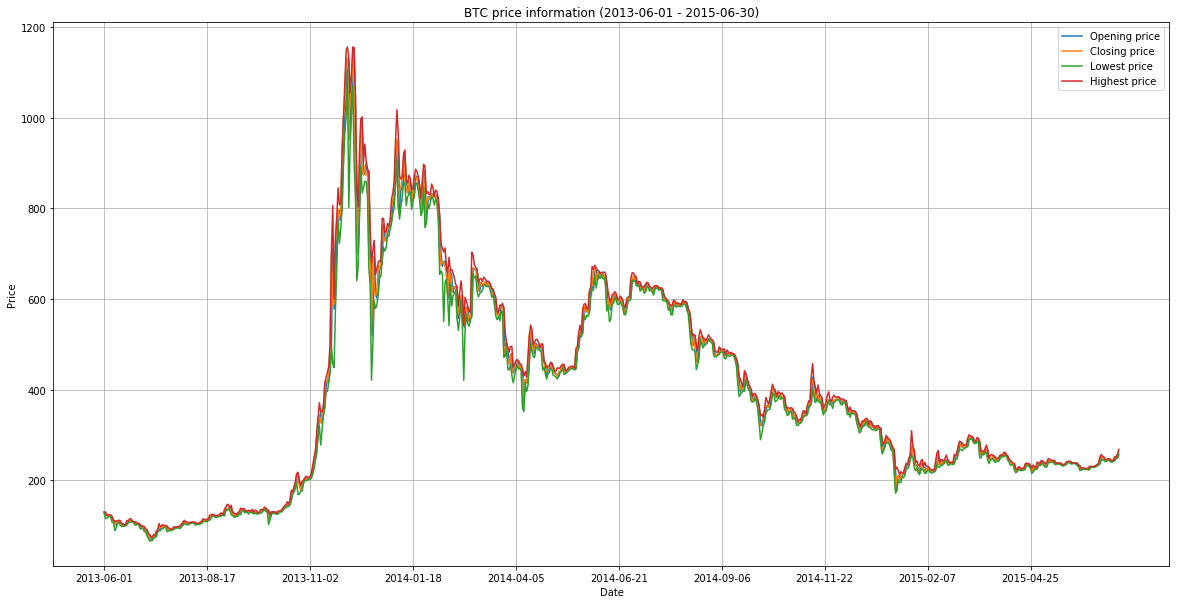

In [33]:
plot_fancy_price_action(coins=coins, symbol='BTC', start_date='2013-06-01', end_date='2015-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [270]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    all_data = coins[((coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date))]
    max_pnd = None
    max_date = None
    #print(all_data)
    for date in all_data.index:
        cur_data = all_data[all_data.index == date]
        cur_pnd = cur_data['high'].sum()/max(cur_data['open'].sum(), cur_data['close'].sum())
        if max_pnd == None or cur_pnd >= max_pnd:
            max_pnd = cur_pnd
            max_date = date
    
    return max_pnd, max_date

In [271]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

(1.1428940004366206, '2017-11-29')

#### Сравните эти значения для разных монет.

In [62]:
for symbol in coins['symbol'].unique():
    print(symbol,": ", find_most_severe_pump_and_dump(coins, symbol=symbol, start_date='2017-06-01', end_date='2018-06-01'))

BTC :  1.1428940004366206
LTC :  1.1082257158899496
DOGE :  1.2747326203208555
VTC :  1.3952095808383234
DGB :  1.359942799461642
DASH :  1.2031621370259378
MAID :  1.291362434422475
XLM :  1.3325105113251052
XVG :  1.726864726979804
USDT :  1.099009900990099
XEM :  1.1358695652173911
ETH :  1.1433508255471652
REP :  1.477601285025879
DCR :  1.8054444587795122
PIVX :  1.3587962962962963
LSK :  1.4424778761061947
WAVES :  1.2543352601156068
ETC :  1.1482493171095107
NEO :  1.232142857142857
ICN :  1.5235616410495143
ZEC :  1.3298776561493881
GNT :  1.6882121234525307
GNO :  1.653659748974773
ANT :  1.7336683417085428
AE :  1.7482936279178192
BAT :  1.2342492522991364
VERI :  33.549253731343285
FUN :  12.490562327959102
PAY :  1.3514021619927934
SNT :  1.3861630321910696
EOS :  1.3202933985330074
GAS :  1.477106227106227
MTL :  1.6728538283062646
PPT :  3.720797720797721
BTM :  5.380321781004265
OMG :  1.3312148056585635
CVC :  1.7261674507210387
ETHOS :  1.3698404867620457
BNB :  1.1760

## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [69]:
def compute_roi(coins, investments, start_date, end_date):
    new_sum = 0
    old_sum = 0
    for coin_name in investments.keys():
        coins_amount = investments[coin_name]/coins['price'][((coins.index == start_date) & (coins['symbol']==coin_name))].sum()
        new_investments = coins_amount*coins['price'][((coins.index == end_date) & (coins['symbol']==coin_name))].sum()
        old_sum += investments[coin_name]
        new_sum += new_investments
    
    return (new_sum-old_sum)/old_sum

In [70]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [71]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [165]:
def plot_bollinger_bands(coins, symbol, window, width):
    all_data = coins[coins['symbol']==symbol]
    dates = list(all_data.index)
    prices = list(all_data['price'])
    MA = all_data['price'].rolling(window).sum()/window
    MA_dates = list(MA.index)
    MA_prices = list(MA)
    cur_avg = 0
    upper_diffs = list()
    lower_diffs = list()
    
    for i in range(window, len(MA)):
        cur_diff = 0
        for j in range(i-window, i+1):
            cur_diff += (prices[j]-MA_prices[i])**2
        cur_diff = (cur_diff/window)**0.5
        upper_diffs.append(MA_prices[i] + width*cur_diff)
        lower_diffs.append(MA_prices[i] - width*cur_diff)
        
    plt.figure(figsize=(20,10))
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.title(symbol + " price information")
    plot1 = plt.plot(MA_dates[window:len(MA_dates)], lower_diffs)
    plot2 = plt.plot(MA_dates[window:len(MA_dates)], upper_diffs)
    plot3 = plt.plot(MA_dates[window:len(MA_dates)], MA_prices[window:len(MA_prices)])
    plot4 = plt.plot(dates[window:len(MA_dates)], prices[window:len(prices)])
    grid_steps = 10
    dates_count = len(all_data.index)
    x = np.arange(0,dates_count,int(dates_count/grid_steps) + 1)
    y = all_data.index[0:dates_count:int(dates_count/grid_steps) + 1]
    plt.legend((plot1[0], plot2[0], plot3[0], plot4[0]), ('Lower bands', 'Upper bands', 'MA', 'Prices'))
    plt.xticks(x,y)
    plt.show()

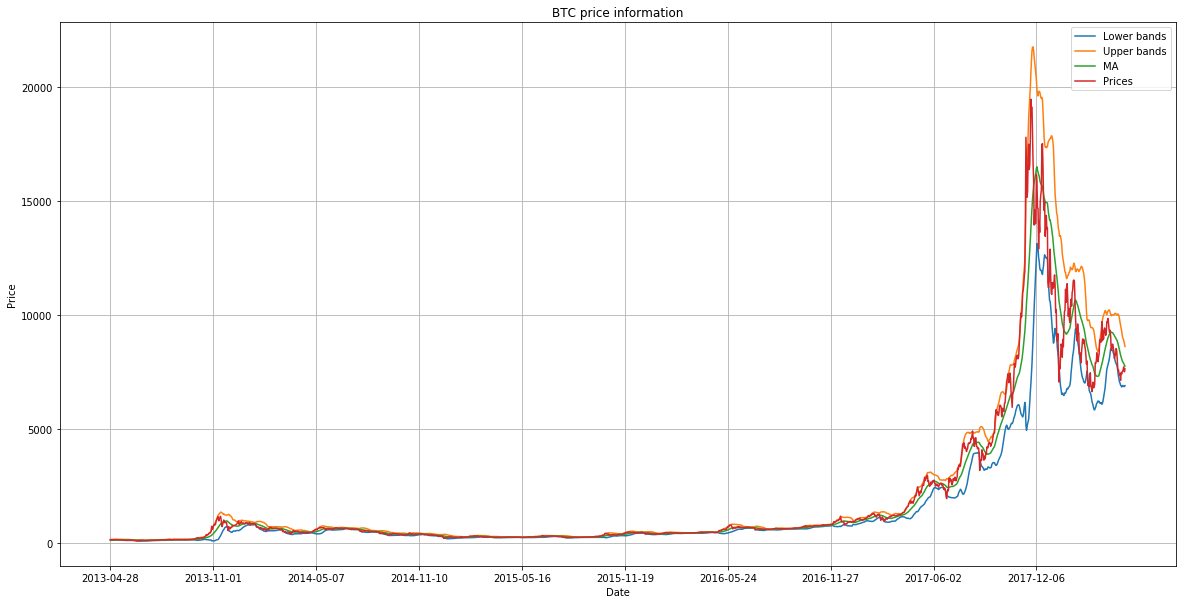

In [262]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

Да

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [260]:
def plot_coins_capitalizations(coins, symbols, start_date):
    total_market = coins['market'][coins.index >= start_date].sum()
    actual_coins = coins[coins.index >= start_date]
    temp_data1 = {}
    temp_data2 = {}
    for symbol in symbols:
        temp_market = 0
        total_market = 0
        temp_data1[symbol] = [list(), list()]
        temp_data2[symbol] = [list(), list()]
        needed_coins = actual_coins['market'][actual_coins['symbol'] == symbol]
        for date in actual_coins.index.unique():
            total_market = actual_coins['market'][actual_coins.index == date].sum()
            temp_market = actual_coins['market'][((actual_coins.index == date) & (actual_coins['symbol'] == symbol))].sum()
            temp_data1[symbol][0].append(date)
            temp_data1[symbol][1].append(temp_market)
            temp_data2[symbol][0].append(date)
            temp_data2[symbol][1].append(temp_market/total_market)
              
    naming = list()           
    for i in range(0,len(symbols)):
        naming.append(symbols[i])
                
    plt.figure(figsize=(20,10))
    plt.xlabel("Date")
    plt.ylabel("Market")
    plt.grid(True)
    plt.title("Crypto market information")
    plots_list1 = list()
    for symbol in symbols:
        temp_plot = plt.plot(temp_data1[symbol][0], temp_data1[symbol][1])
        plots_list1.append(temp_plot[0])
    grid_steps = 10
    dates_count = len(needed_coins.index)
    x1 = np.arange(0,dates_count,int(dates_count/grid_steps) + 1)
    y1 = needed_coins.index[0:dates_count:int(dates_count/grid_steps) + 1] 
    plt.legend(tuple(plots_list1), tuple(naming))
    plt.xticks(x1,y1)
    plt.show()  
    
    plt.figure(figsize=(20,10))
    plt.xlabel("Date")
    plt.ylabel("Market")
    plt.grid(True)
    plt.title("Crypto market/total_market information")
    plots_list2 = list()
    for symbol in symbols:
        temp_plot = plt.plot(temp_data2[symbol][0], temp_data2[symbol][1])
        plots_list2.append(temp_plot[0])
    x2 = np.arange(0,dates_count,int(dates_count/grid_steps) + 1)
    y2 = needed_coins.index[0:dates_count:int(dates_count/grid_steps) + 1] 
    plt.legend(tuple(plots_list2), tuple(naming))
    plt.xticks(x2,y2)
    plt.show()   

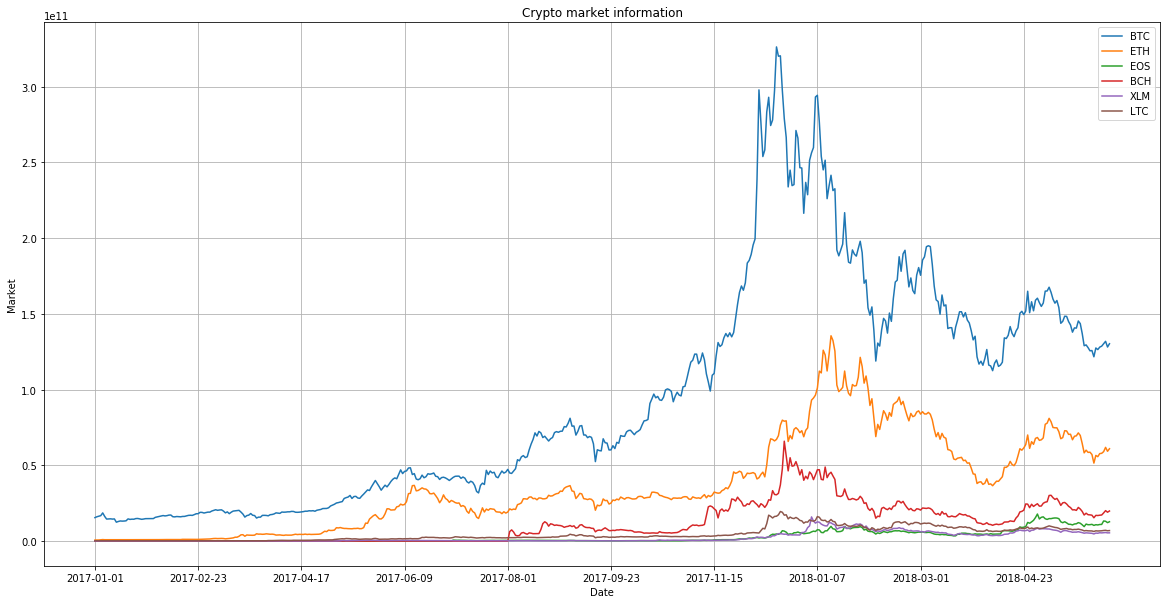

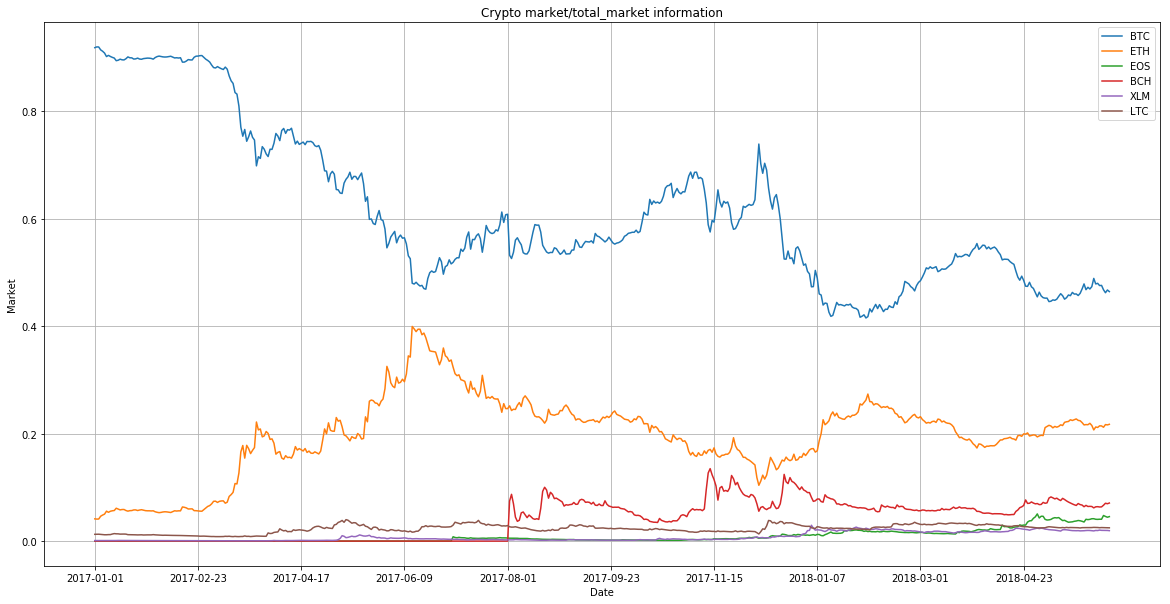

In [261]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-01-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Если взять ETH и BTC, то можно заметить, что капитализация менялась зеркально, из чего можно сделать вывод о переходе денежных вложений от одной монеты к другой

## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [28]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

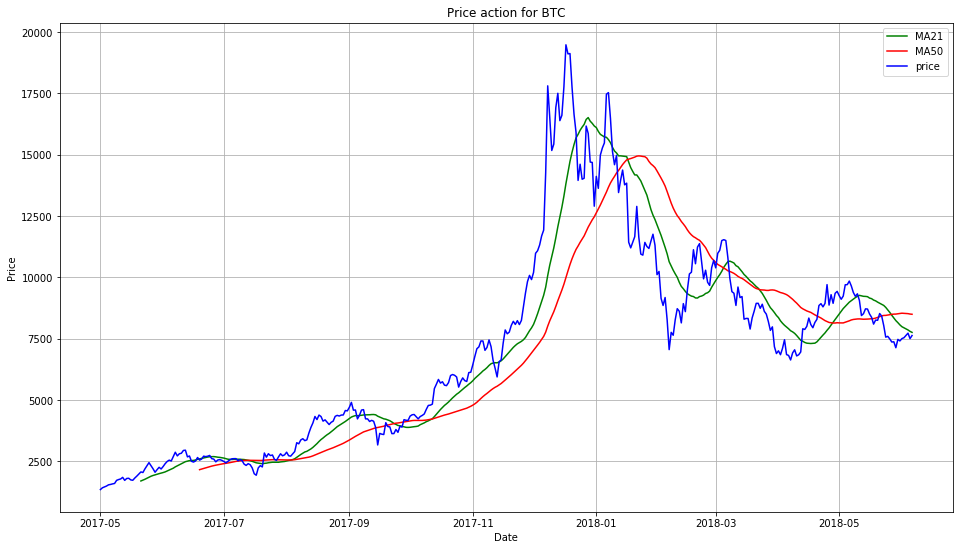

In [31]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [32]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

![Disclamer](https://i0.kym-cdn.com/entries/icons/mobile/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.jpg)